In [1]:
from __future__ import division

import os
import sys
import tensorflow as tf
import skimage.io as io
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

sys.path.append("/home/shou/network/fcn/tf-image-segmentation/")
sys.path.append("/home/shou/network/tf-models/research/slim/")

fcn_16s_checkpoint_path = '/home/shou/network/dataset/model_fcn8s_final.ckpt'

# os.environ["CUDA_VISIBLE_DEVICES"] = '1'

slim = tf.contrib.slim

from tf_image_segmentation.models.fcn_8s import FCN_8s
from tf_image_segmentation.models.fcn_32s import FCN_32s
from tf_image_segmentation.models.fcn_16s import FCN_16s
from tf_image_segmentation.utils.inference import adapt_network_for_any_size_input
from tf_image_segmentation.utils.pascal_voc import pascal_segmentation_lut

In [2]:
number_of_classes = 2

#image_filename = 'small_cat.jpg'

image_filename_placeholder = tf.placeholder(tf.string)

image_tensor = tf.read_file(image_filename_placeholder)

image_tensor = tf.image.decode_jpeg(image_tensor, channels=3)

# Fake batch for image and annotation by adding
# leading empty axis.
image_batch_tensor = tf.expand_dims(image_tensor, axis=0)

# Be careful: after adaptation, network returns final labels
# and not logits
FCN_8s = adapt_network_for_any_size_input(FCN_8s, 32)


pred, fcn_16s_variables_mapping = FCN_8s(image_batch_tensor=image_batch_tensor,
                                          number_of_classes=number_of_classes,
                                          is_training=False)

# The op for initializing the variables
initializer = tf.local_variables_initializer()

saver = tf.train.Saver()
# saver = tf.train.Saver(write_version=tf.train.SaverDef.V1)

Instructions for updating:
Use the `axis` argument instead


INFO:tensorflow:Restoring parameters from /home/shou/network/dataset/model_fcn8s_final.ckpt


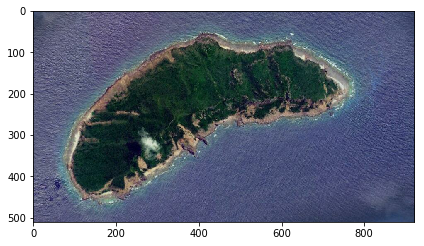

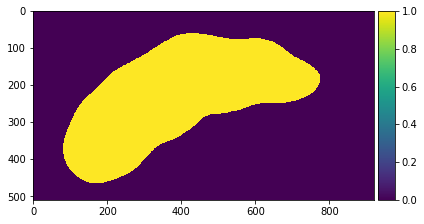

In [12]:
with tf.Session() as sess:
    
    sess.run(initializer)

    saver.restore(sess, fcn_16s_checkpoint_path)
    
    #saver = tf.train.import_meta_graph('/home/shou/network/model_fcn32s.ckpt.meta')
    #saver.restore(sess, tf.train.latest_checkpoint('/home/shou/network/'))
    
    image_filename = '/home/shou/network/test_islands/diaoyu.jpg'
    image_np, pred_np = sess.run([image_tensor, pred], feed_dict={image_filename_placeholder: image_filename})
    
    io.imshow(image_np)
    io.show()
    
    io.imshow(pred_np.squeeze())
    io.show()
    